# Mapping outliers

This notebook digs more into the outlier areas seen on the added utility maps of England and Wales plotted in the previous notebook.

## Plain English summary

A few areas in England and Wales break the trend shown by the rest. For the treated ischaemic population as a whole, most places show an improvement in added utility in the mothership scenario compared with drip-and-ship. However a few places show a worsening instead.

We will find out more about these outlier areas to see if we can find general trends of when the mothership scenario is a bad idea.

## Aims

+ Find the names of regions that break the trend
+ Look for trends in the treatment times of the outlier regions
+ Use existing generic geography and outcome matrix methods to check that the outlier results make sense.

## Methods

We define outlier regions as any that has better added utility in the drip-and-ship scenario than in mothership.

First we look for other regions that share similar travel times to the outliers.

Then we frame some of the outlier regions in the same context as the generic geography and the outcome matrix results to check what the stroke outcome model has output to create these outliers.

## Import packages

In [1]:
# import contextily as ctx
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import stroke_maps.load_data
import stroke_maps.catchment
import stroke_maps.geo  # to make catchment area geometry

pd.set_option('display.max_rows', 150)

In [2]:
dir_output = 'output'
dir_data = 'data'

## Load data

### Load shape file

In [3]:
sa_gdf = stroke_maps.load_data.ni_sa_geography()
sa_gdf = sa_gdf.to_crs('EPSG:29902')

sa_gdf.head(3)

,OBJECTID,SA2011,SOA2011,X_COORD,Y_COORD,Hectares,Shape_Leng,Shape_Area,Code_all,geometry
0,1,N00000002,95AA01S2,315465,377176,169.044,8476.858446,1.690436e+06,N00000002,"POLYGON ((315481.125 376464.219, 315472.344 37..."
1,2,N00000004,95AA01S2,307147,376182,8700.040,46727.719482,8.700042e+07,N00000004,"POLYGON ((307740.812 382573.219, 307762.250 38..."
2,3,N00000007,95AA01S3,314461,383440,1287.990,21817.292006,1.287995e+07,N00000007,"POLYGON ((311363.312 385217.625, 311600.000 38..."


In [4]:
# Load country outline
outline = stroke_maps.load_data.ni_outline()
outline = outline.to_crs('EPSG:29902')

In [5]:
outline

,ID,DATASET,OSNI_SCALE,SHAPE_Length,SHAPE_Area,OBJECTID,geometry
0,6834691,Outline of Northern Ireland,1:50000,1.801673e+06,1.360305e+10,1,"MULTIPOLYGON (((312511.612 319450.819, 312511...."


### Load hospital info

Load in the stroke unit coordinates and merge in the services information:

In [6]:
df_units = stroke_maps.load_data.ni_stroke_unit_services()

df_units.head(3).T

Postcode,BT126BA,BT161RH,BT358DR
Hospital_name,Royal Victoria,Ulster,Daisy Hill
City,Belfast,Belfast,Newry
door_to_needle,43,50,38
Fixed,2.0,NaN,NaN
use_ivt,1,1,0
use_mt,1,0,0


In [7]:
hospitals_gdf = stroke_maps.load_data.stroke_unit_coordinates_ni()
hospitals_gdf = pd.merge(
    hospitals_gdf, df_units[['use_ivt', 'use_mt']],
    left_index=True, right_index=True, how='right'
)

In [8]:
hospitals_gdf.head(3)

,Hospital_name,City,square_letter,square_easting,square_northing,square_ref_easting,square_ref_northing,easting,northing,geometry,use_ivt,use_mt
Postcode,,,,,,,,,,,,
BT126BA,Royal Victoria,Belfast,J,32226,73709,300000,300000,332226,373709,POINT (332226.000 373709.000),1,1
BT161RH,Ulster,Belfast,J,41440,74272,300000,300000,341440,374272,POINT (341440.000 374272.000),1,0
BT358DR,Daisy Hill,Newry,J,7549,27085,300000,300000,307549,327085,POINT (307549.000 327085.000),0,0


### Load LSOA model output data

In [9]:
sa_data = pd.read_csv(os.path.join(dir_output, 'cohort_outcomes_weighted.csv'))
sa_data.head(3).T

,0,1,2
lsoa,N00000001,N00000002,N00000003
closest_ivt_time,19.032658,23.292278,20.471335
closest_ivt_unit,BT412RL,BT412RL,BT412RL
closest_mt_time,31.400562,24.67773,24.67773
closest_mt_unit,BT126BA,BT126BA,BT126BA
transfer_mt_time,28.748618,28.748618,28.748618
transfer_mt_unit,BT126BA,BT126BA,BT126BA
mt_transfer_required,True,True,True
ivt_drip_ship,109.032658,113.292278,110.471335
mt_drip_ship,257.781276,262.040896,259.219953


In [10]:
# Merge with shape file

sa_data_gdf = sa_gdf.merge(sa_data, left_on='SA2011', right_on='lsoa', how='right')

sa_data_gdf.head().T

,0,1,2,3,4
OBJECTID,7,1,4537,2,6
SA2011,N00000001,N00000002,N00000003,N00000004,N00000005
SOA2011,95AA01S1,95AA01S2,95AA01S2,95AA01S2,95AA01S2
X_COORD,315036,315465,316689,307147,311125
Y_COORD,380003,377176,378660,376182,381985
Hectares,540.076,169.044,500.21,8700.04,2063.96
Shape_Leng,12921.250935,8476.858446,12659.603928,46727.719482,22346.461488
Shape_Area,5400762.37063,1690435.75048,5002104.72589,87000415.751,20639552.7312
Code_all,N00000001,N00000002,N00000003,N00000004,N00000005
geometry,"POLYGON ((315795.0312999999 380324.1875, 31578...","POLYGON ((315481.125 376464.21880000085, 31547...","POLYGON ((315434.4062999999 378660.625, 315415...","POLYGON ((307740.8125 382573.21880000085, 3077...","POLYGON ((307740.8125 382573.21880000085, 3077..."


In [11]:
cols = [c for c in sa_data_gdf.columns if (('lvo' in c) & ('nlvo' not in c) & ('utility' in c))]

sa_data_gdf[cols].head(10).T

,0,1,2,3,4,5,6,7,8,9
drip_ship_lvo_ivt_added_utility,0.05832,0.05714,0.05792,0.05675,0.05914,0.05792,0.05999,0.05999,0.05956,0.05873
drip_ship_lvo_ivt_mt_added_utility,0.11011,0.10762,0.10927,0.10681,0.11183,0.10927,0.11362,0.11362,0.11272,0.11096
drip_ship_lvo_mt_added_utility,0.11011,0.10762,0.10927,0.10681,0.11183,0.10927,0.11362,0.11362,0.11272,0.11096
mothership_lvo_ivt_added_utility,0.05490,0.05675,0.05675,0.05526,0.05453,0.05600,0.05453,0.05563,0.05600,0.05563
mothership_lvo_ivt_mt_added_utility,0.15534,0.15937,0.15937,0.15613,0.15456,0.15774,0.15456,0.15693,0.15774,0.15693
mothership_lvo_mt_added_utility,0.15534,0.15937,0.15937,0.15613,0.15456,0.15774,0.15456,0.15693,0.15774,0.15693
drip_ship_lvo_mix_added_utility,0.10610,0.10371,0.10529,0.10293,0.10775,0.10529,0.10946,0.10946,0.10860,0.10691
mothership_lvo_mix_added_utility,0.14756,0.15142,0.15142,0.14831,0.14681,0.14986,0.14681,0.14908,0.14986,0.14908


Patient proportions:

In [12]:
patient_proportions = pd.read_csv(
    os.path.join(dir_data, 'patient_proportions.csv'),
    index_col=0, header=None).squeeze()

In [13]:
patient_proportions

0
haemorrhagic         0.13600
lvo_no_treatment     0.14648
lvo_ivt_only         0.00840
lvo_ivt_mt           0.08500
lvo_mt_only          0.01500
nlvo_no_treatment    0.50252
nlvo_ivt             0.10660
Name: 1, dtype: float64

In [14]:
# Proportion of treated ischaemic patients:
prop_ischaemic_treated = 0.0

for key, value in patient_proportions.items():
    if (('lvo' in key) & ('no_treat' not in key)):
        print(key)
        prop_ischaemic_treated += value

prop_ischaemic_treated

lvo_ivt_only
lvo_ivt_mt
lvo_mt_only
nlvo_ivt


0.21500000000000002

In [15]:
prop_nlvo_of_treated = patient_proportions['nlvo_ivt'] / prop_ischaemic_treated
prop_lvo_of_treated = 1.0 - prop_nlvo_of_treated

prop_nlvo_of_treated, prop_lvo_of_treated

(0.49581395348837204, 0.5041860465116279)

## Calculate difference between Mothership and Drip and Ship

In [16]:
cohort_names = ['nlvo_ivt', 'lvo_mix', 'weighted_treated']

outcome_names = ['added_utility', 'added_mrs_less_equal_2', 'mrs_shift']

In [17]:
cols_diff = [f'{c}_{o}_mothership_minus_dripship' for c in cohort_names for o in outcome_names]
cols_moth = [f'mothership_{c}_{o}' for c in cohort_names for o in outcome_names]
cols_drip = [f'drip_ship_{c}_{o}' for c in cohort_names for o in outcome_names]

sa_data_gdf[cols_diff] = sa_data_gdf[cols_moth].values - sa_data_gdf[cols_drip].values

## Map outliers

Make a new dataframe with only a subset of the full data:

In [18]:
data_field = 'added_utility'

cols = [
    f'nlvo_ivt_{data_field}_mothership_minus_dripship',
    f'lvo_mix_{data_field}_mothership_minus_dripship',
    f'weighted_treated_{data_field}_mothership_minus_dripship',
]

In [19]:
gdf_outliers = sa_data_gdf[['geometry'] + cols]

Find outliers separately for each case because the outlying condition is different each time.

For nLVO, most of the map has negative mothership minus drip-and-ship added utility, so pick out values that are positive.

For the LVO and ischaemic mix, most of the map is positive so pick out any negative values.

In [20]:
col = cols[0]
gdf_outliers[f'outlier_{col}'] = gdf_outliers[col] > 0.0

# How many values are outliers?
print(len(gdf_outliers.loc[gdf_outliers[f'outlier_{col}'] == True]))

0


/home/anna/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
col = cols[1]
gdf_outliers[f'outlier_{col}'] = gdf_outliers[col] < 0.0

# How many values are outliers?
print(len(gdf_outliers.loc[gdf_outliers[f'outlier_{col}'] == True]))

0


/home/anna/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [22]:
col = cols[2]
gdf_outliers[f'outlier_{col}'] = gdf_outliers[col] < 0.0

# How many values are outliers?
print(len(gdf_outliers.loc[gdf_outliers[f'outlier_{col}'] == True]))

285


/home/anna/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Only the mixed population has outliers. Plot their locations:

285


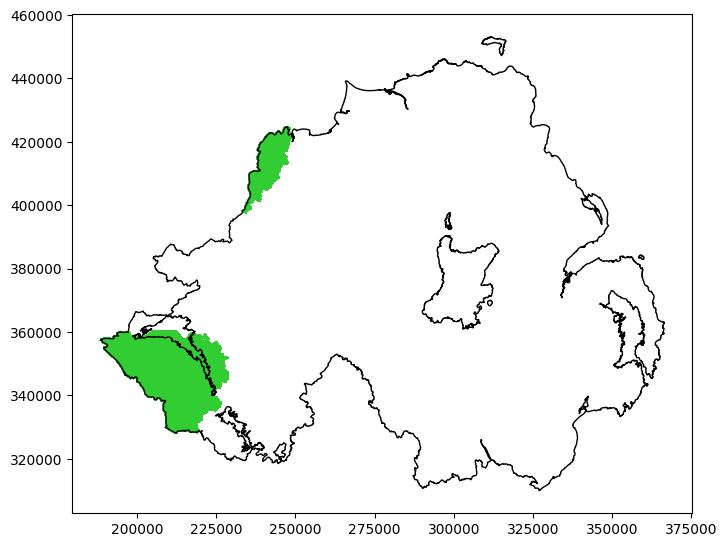

In [23]:
col = cols[2]

# Plot data
fig, ax = plt.subplots(figsize=(8, 10))
mask = gdf_outliers[f'outlier_{col}'] == True
print(len(gdf_outliers.loc[mask]))
gdf_outliers.loc[mask].plot(
    ax=ax, # Set which axes to use for plot (only one here)
    color='LimeGreen', # Column to apply colour
    antialiased=False, # Avoids artifact boundry lines
    edgecolor='face', # Make LSOA boundry same colour as area
)
# Add country border
outline.plot(ax=ax, edgecolor='k', facecolor='None', linewidth=1.0)
plt.show()

The outlier areas are near Derry~Londonderry (top left) and Enniskillen (bottom left).

## Check outlier times

Make a smaller dataframe of all of the columns for just these outlier areas:

In [24]:
col = cols[2]

mask = gdf_outliers[f'outlier_{col}'] == True

gdf_out_adv = sa_data_gdf.loc[mask].copy()

In [25]:
gdf_out_adv

,OBJECTID,SA2011,SOA2011,X_COORD,Y_COORD,Hectares,Shape_Leng,Shape_Area,Code_all,geometry,...,mothership_weighted_treated_added_mrs_less_equal_2,nlvo_ivt_added_utility_mothership_minus_dripship,nlvo_ivt_added_mrs_less_equal_2_mothership_minus_dripship,nlvo_ivt_mrs_shift_mothership_minus_dripship,lvo_mix_added_utility_mothership_minus_dripship,lvo_mix_added_mrs_less_equal_2_mothership_minus_dripship,lvo_mix_mrs_shift_mothership_minus_dripship,weighted_treated_added_utility_mothership_minus_dripship,weighted_treated_added_mrs_less_equal_2_mothership_minus_dripship,weighted_treated_mrs_shift_mothership_minus_dripship
2395,2396,N00002396,95MM01S1,246031,414517,20.23900,2634.225300,2.023905e+05,N00002396,"POLYGON ((245965.453 414798.875, 245967.125 41...",...,0.10846,-0.03431,-0.03761,0.19790,0.03364,0.03558,-0.17623,-0.00005,-0.00071,0.00927
2396,2397,N00002397,95MM01S1,245942,414159,9.32464,2208.270678,9.324638e+04,N00002397,"POLYGON ((245821.766 414266.656, 245827.750 41...",...,0.10776,-0.03487,-0.03822,0.20109,0.03291,0.03479,-0.17234,-0.00069,-0.00141,0.01282
2397,2398,N00002398,95MM01S1,245623,414257,6.08181,1203.036419,6.081809e+04,N00002398,"POLYGON ((245663.391 414397.375, 245695.734 41...",...,0.10776,-0.03487,-0.03822,0.20109,0.03291,0.03479,-0.17234,-0.00069,-0.00141,0.01282
2398,2399,N00002399,95MM01S1,245758,414029,6.52089,1835.961157,6.520891e+04,N00002399,"POLYGON ((245576.219 414097.156, 245589.625 41...",...,0.10776,-0.03487,-0.03822,0.20109,0.03291,0.03479,-0.17234,-0.00069,-0.00141,0.01282
2399,2401,N00002400,95MM01S1,246075,415151,42.97760,3660.035025,4.297758e+05,N00002400,"POLYGON ((246418.297 415455.938, 246417.844 41...",...,0.10846,-0.03511,-0.03849,0.20260,0.03253,0.03442,-0.17043,-0.00101,-0.00173,0.01452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,4492,N00004497,95ZZ10W1,234039,398236,65.97030,4265.446487,6.597027e+05,N00004497,"POLYGON ((234075.859 398764.750, 234131.844 39...",...,0.09659,-0.03470,-0.03796,0.19850,0.03375,0.03544,-0.17576,-0.00018,-0.00095,0.00980
4512,4508,N00004513,95ZZ13W1,238681,405805,531.17600,16758.730960,5.311762e+06,N00004513,"POLYGON ((239408.969 404871.531, 239379.578 40...",...,0.10008,-0.03467,-0.03796,0.19885,0.03360,0.03536,-0.17529,-0.00026,-0.00100,0.01022
4513,4509,N00004514,95ZZ13W1,236685,407880,1412.80000,23181.342114,1.412799e+07,N00004514,"POLYGON ((239520.891 410897.312, 239507.125 41...",...,0.10218,-0.03475,-0.03806,0.19957,0.03339,0.03519,-0.17437,-0.00040,-0.00113,0.01104
4514,4510,N00004515,95ZZ13W1,239741,407602,1401.10000,31616.525737,1.401096e+07,N00004515,"POLYGON ((239853.359 410268.375, 239854.656 41...",...,0.10148,-0.03472,-0.03801,0.19927,0.03348,0.03526,-0.17474,-0.00034,-0.00107,0.01070


Eyeball the travel and treatment time columns:

In [28]:
cols_to_check = [
    'SA2011',
    'closest_ivt_time',
    'closest_ivt_unit',
    'closest_mt_time',
    'closest_mt_unit',
    'transfer_mt_time',
    'transfer_mt_unit',
    'mt_transfer_required',
    'ivt_drip_ship',
    'mt_drip_ship',
    'ivt_mothership',
    'mt_mothership'
]


In [29]:
gdf_out_adv[cols_to_check].T

,2395,2396,2397,2398,2399,2400,2401,2402,2403,2405,...,3057,3058,3059,4449,4495,4496,4512,4513,4514,4517
SA2011,N00002396,N00002397,N00002398,N00002399,N00002400,N00002401,N00002402,N00002403,N00002404,N00002406,...,N00003058,N00003059,N00003060,N00004450,N00004496,N00004497,N00004513,N00004514,N00004515,N00004518
closest_ivt_time,4.5653,4.5653,4.5653,4.5653,2.554855,2.554855,2.554855,4.5653,4.5653,9.834026,...,9.834026,8.157786,6.411211,21.890633,26.048239,27.404887,20.471335,16.08844,17.572534,14.577241
closest_ivt_unit,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,...,BT746DN,BT746DN,BT746DN,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB,BT476SB
closest_mt_time,87.1,88.4,88.4,88.4,87.1,89.7,88.4,87.1,87.1,94.9,...,107.9,106.6,105.3,104.0,110.5,109.2,102.7,98.8,100.1,97.5
closest_mt_unit,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,...,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA
transfer_mt_time,88.4,88.4,88.4,88.4,88.4,88.4,88.4,88.4,88.4,88.4,...,104.0,104.0,104.0,88.4,88.4,88.4,88.4,88.4,88.4,88.4
transfer_mt_unit,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,...,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA,BT126BA
mt_transfer_required,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
ivt_drip_ship,94.5653,94.5653,94.5653,94.5653,92.554855,92.554855,92.554855,94.5653,94.5653,99.834026,...,99.834026,98.157786,96.411211,111.890633,116.048239,117.404887,110.471335,106.08844,107.572534,104.577241
mt_drip_ship,302.9653,302.9653,302.9653,302.9653,300.954855,300.954855,300.954855,302.9653,302.9653,308.234026,...,323.834026,322.157786,320.411211,320.290633,324.448239,325.804887,318.871335,314.48844,315.972534,312.977241


Find the difference in travel times between LSOA to MT unit and LSOA to IVT unit.

In [30]:
gdf_out_adv['unit_time_diff'] = gdf_out_adv['closest_mt_time'] - gdf_out_adv['closest_ivt_time']

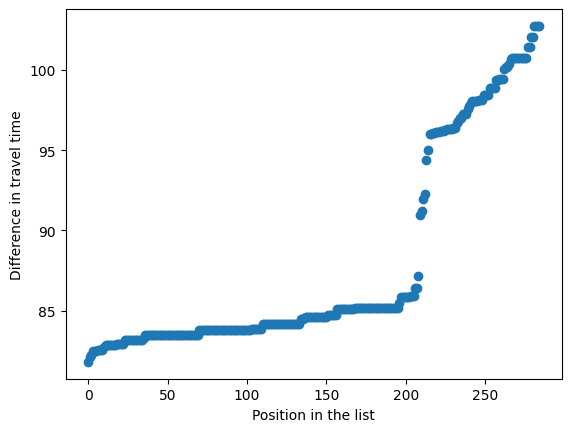

In [31]:
plt.scatter(np.arange(len(gdf_out_adv)), sorted(gdf_out_adv['unit_time_diff']))
plt.xlabel('Position in the list')
plt.ylabel('Difference in travel time')
plt.show()

Eyeballing this, nearly all of the outliers have a difference in time of at least 80 minutes.

Find the shortest time:

In [32]:
gdf_out_adv['unit_time_diff'].min()

81.79511309424771

## Pick out LSOAs similar to the outliers

Find if there are other LSOAs in the full dataframe that are not flagged as outliers but have a similar difference in unit travel times.

In [33]:
sa_data_gdf['unit_time_diff'] = sa_data_gdf['closest_mt_time'] - sa_data_gdf['closest_ivt_time']

In [34]:
mask_time = sa_data_gdf['unit_time_diff'] >= 81.79

In [35]:
len(sa_data_gdf.loc[mask_time])

321

There are more LSOAs in this list than there were in the outliers list.

Plot the new flagged LSOAs next to the marked outliers:

285


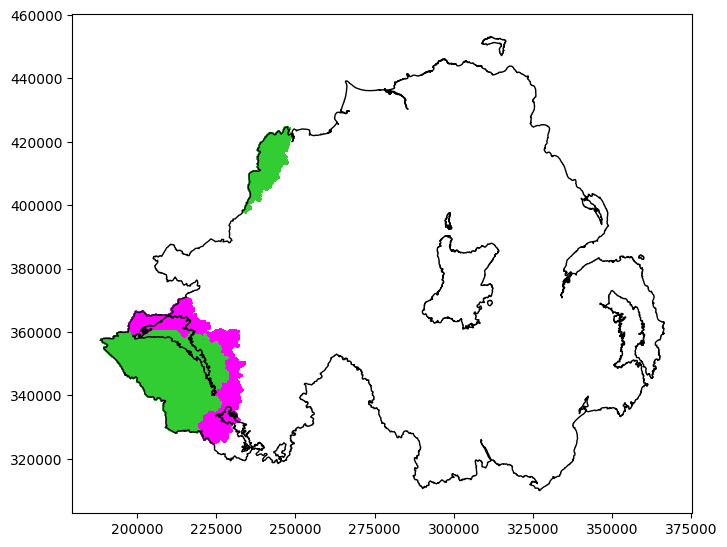

In [36]:
# Plot data
fig, ax = plt.subplots(figsize=(8, 10))

sa_data_gdf.loc[mask_time].plot(
    ax=ax, # Set which axes to use for plot (only one here)
    color='magenta',
    antialiased=False, # Avoids artifact boundry lines
    edgecolor='face', # Make LSOA boundry same colour as area
)

mask = gdf_outliers[f'outlier_{col}'] == True
print(len(gdf_outliers.loc[mask]))
gdf_outliers.loc[mask].plot(
    ax=ax, # Set which axes to use for plot (only one here)
    color='LimeGreen',
    antialiased=False, # Avoids artifact boundry lines
    edgecolor='face', # Make LSOA boundry same colour as area
)

# Add country border
outline.plot(ax=ax, edgecolor='k', facecolor='None', linewidth=1.0)
plt.show()

## Generic geography

Show two cases with the same circle plots as used in the generic geography example. The first case is the stroke units whose outliers have the smallest time difference between hospitals. The second case is the same for the biggest time difference.

In [40]:
# Take the mean of all values in the outlier dataframe grouped by closest IVT unit:
gdf_out_adv_mean = gdf_out_adv.groupby('closest_ivt_unit').mean(numeric_only=True)

# Only keep columns involving times:
gdf_out_adv_mean = gdf_out_adv_mean[
    [t for t in gdf_out_adv.columns if (
        ('time' in t) | (t.endswith('drip_ship')) | (t.endswith('mothership'))
    )]
]
# Sort by increasing time difference:
gdf_out_adv_mean = gdf_out_adv_mean.sort_values('unit_time_diff')

# Merge in stroke unit names:
gdf_out_adv_mean = pd.merge(
    gdf_out_adv_mean, df_units[['Hospital_name', 'City']],
    left_index=True, right_index=True, how='left'
)

gdf_out_adv_mean

,closest_ivt_time,closest_mt_time,transfer_mt_time,ivt_drip_ship,mt_drip_ship,ivt_mothership,mt_mothership,unit_time_diff,Hospital_name,City
closest_ivt_unit,,,,,,,,,,
BT476SB,8.955828,93.040191,88.4,98.955828,307.355828,183.040191,243.040191,84.084363,Altnagelvin,Londonderry
BT746DN,13.509917,111.714474,104.0,103.509917,327.509917,201.714474,261.714474,98.204557,South West,Enniskillen


The shortest time difference*: stroke unit BT47 6SB, Altnagelvin, Londonderry.  
The largest time difference: stroke unit BT74 6DN, South West, Enniskillen.

### Setup for outcomes

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import sys

# sys.path.insert(0, '../general_results')

from geography_calc import main

In [44]:
fixed_times = pd.read_csv(
        os.path.join(dir_data, 'pathway_times.csv'),
        index_col=0, header=None).squeeze()

In [45]:
patient_proportions = pd.read_csv(
    os.path.join(dir_data, 'patient_proportions.csv'),
    index_col=0, header=None).squeeze()

In [46]:
patient_proportions

0
haemorrhagic         0.13600
lvo_no_treatment     0.14648
lvo_ivt_only         0.00840
lvo_ivt_mt           0.08500
lvo_mt_only          0.01500
nlvo_no_treatment    0.50252
nlvo_ivt             0.10660
Name: 1, dtype: float64

### Example 1:

Calculate coordinates of an outlier patient:

In [47]:
gdf_patient = gdf_out_adv.loc[gdf_out_adv['closest_ivt_unit'] == 'BT476SB'].iloc[0]

In [48]:
time_to_ivt = gdf_patient['closest_ivt_time']
time_to_mt = gdf_patient['closest_mt_time']
time_transfer = gdf_patient['transfer_mt_time']

# Cosine rule:
ang = np.arccos(
    (time_to_ivt**2.0 + time_transfer**2.0 - time_to_mt**2.0) /
    (2 * time_to_ivt * time_transfer)        
    )

# Coordinates relative to IVT unit (sohcahtoa):
patient_x = time_to_ivt * np.sin(np.pi - ang)
patient_y = time_to_ivt * np.cos(np.pi - ang)

(patient_x, patient_y)

(4.342646614048348, -1.4083255685609162)

In [49]:
# Add an extra fixed time that is specific to this generic geography example.
fixed_times['travel_ivt_to_mt'] = time_transfer
fixed_times['ivt_x'] = 0
fixed_times['ivt_y'] = 0
fixed_times['mt_x'] = 0
fixed_times['mt_y'] = -fixed_times['travel_ivt_to_mt']

# Calculate the fixed times to treatment _excluding_ the travel from the patient location to the first stroke unit.

# Times for usual care (the patient goes to their nearest stroke unit and is later transferred to the MT unit if necessary):

fixed_times['usual_care_ivt'] = (
    fixed_times['onset_to_ambulance_arrival'] + 
    fixed_times['arrival_to_ivt']
    )

fixed_times['usual_care_mt'] = (
    fixed_times['onset_to_ambulance_arrival'] + 
    # fixed_times['arrival_to_ivt'] + 
    fixed_times['net_operational_delay_to_mt_for_transfer'] + 
    fixed_times['travel_ivt_to_mt'] + 
    fixed_times['arrival_to_mt']
    )

# Times for mothership (the patient goes directly to the MT unit):

fixed_times['mothership_ivt'] = (
    fixed_times['onset_to_ambulance_arrival'] + 
    fixed_times['arrival_to_ivt']
    )

fixed_times['mothership_mt'] = (
    fixed_times['onset_to_ambulance_arrival'] + 
    fixed_times['arrival_to_mt']
    )

In [50]:
dict_grid_time_travel, dict_grid_time_travel_info, dict_outcomes_dicts = (
    main(fixed_times, patient_proportions))

In [51]:
def plot_geography_outliers(dict_grid_time_travel, dict_grid_time_travel_info, dict_outcomes_dicts, patient_x, patient_y):
    # Shared grid extents:
    extent = [
        -dict_grid_time_travel_info['diff']['mothership_grid_xy_max'],
        dict_grid_time_travel_info['diff']['mothership_grid_xy_max'],
        -dict_grid_time_travel_info['diff']['mothership_grid_xy_max'],
        dict_grid_time_travel_info['diff']['mothership_grid_xy_max'],
    ]
    
    # Shared colour limits:
    vmin = min([
        dict_outcomes_dicts['diff']['nlvo_ivt']['added_utility'].min(),
        dict_outcomes_dicts['diff']['lvo']['added_utility'].min(),
        dict_outcomes_dicts['diff']['mixed']['added_utility'].min(),
    ])
    vmax = max([
        dict_outcomes_dicts['diff']['nlvo_ivt']['added_utility'].max(),
        dict_outcomes_dicts['diff']['lvo']['added_utility'].max(),
        dict_outcomes_dicts['diff']['mixed']['added_utility'].max(),
    ])
    vlim = max([abs(vmin), abs(vmax)])
    vmin = -vlim
    vmax = vlim
    
    contour_levels = np.linspace(vmin, vmax, 9)
    
    cmap = 'bwr'
    
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))
    
    ax_time = axs[0]
    ax_nlvo = axs[1]
    ax_lvo = axs[2]
    ax_mix = axs[3]
    
    s = dict_grid_time_travel['diff'].shape
    
    t = ax_time.imshow(
        -dict_grid_time_travel['diff'],
        extent=extent,
        origin='lower'
    )
    plt.colorbar(t, orientation='horizontal', label='Travel time difference')
    
    grid = dict_outcomes_dicts['diff']['nlvo_ivt']['added_utility'].values.reshape(s)
    t = ax_nlvo.imshow(
        grid,
        extent=extent,
        origin='lower',
        vmin=vmin,
        vmax=vmax,
        cmap=cmap
    )
    plt.colorbar(t, orientation='horizontal', label='Added utility\n(advantage of mothership)')
    CS = ax_nlvo.contour(
        grid,
        extent=extent,
        levels=contour_levels,
        colors='k',
        linewidths=0.5
        )
    ax_nlvo.clabel(CS, inline=True, fontsize=10)
    
    grid = dict_outcomes_dicts['diff']['lvo']['added_utility'].values.reshape(s)
    t = ax_lvo.imshow(
        grid,
        extent=extent,
        origin='lower',
        vmin=vmin,
        vmax=vmax,
        cmap=cmap
    )
    plt.colorbar(t, orientation='horizontal', label='Added utility\n(advantage of mothership)')
    CS = ax_lvo.contour(
        grid,
        extent=extent,
        levels=contour_levels,
        colors='k',
        linewidths=0.5
        )
    ax_lvo.clabel(CS, inline=True, fontsize=10)
    
    grid = dict_outcomes_dicts['diff']['mixed']['added_utility'].values.reshape(s)
    t = ax_mix.imshow(
        grid,
        extent=extent,
        origin='lower',
        vmin=vmin,
        vmax=vmax,
        cmap=cmap
    )
    plt.colorbar(t, orientation='horizontal', label='Added utility\n(advantage of mothership)')
    CS = ax_mix.contour(
        grid,
        extent=extent,
        levels=contour_levels,
        colors='k',
        linewidths=0.5
        )
    ax_mix.clabel(CS, inline=True, fontsize=10)
    
    for ax in axs:
        ax.scatter(dict_grid_time_travel_info['diff']['usual_care_unit_x'], dict_grid_time_travel_info['diff']['usual_care_unit_y'], marker='o', color='k')
        ax.scatter(dict_grid_time_travel_info['diff']['mothership_unit_x'], dict_grid_time_travel_info['diff']['mothership_unit_y'], marker='D', color='k')
        ax.scatter(patient_x, patient_y, marker='x', color='k')
    
    ax_time.set_title('Travel time')
    ax_nlvo.set_title('nLVO')
    ax_lvo.set_title('LVO')
    ax_mix.set_title('mix')
    
    plt.show()

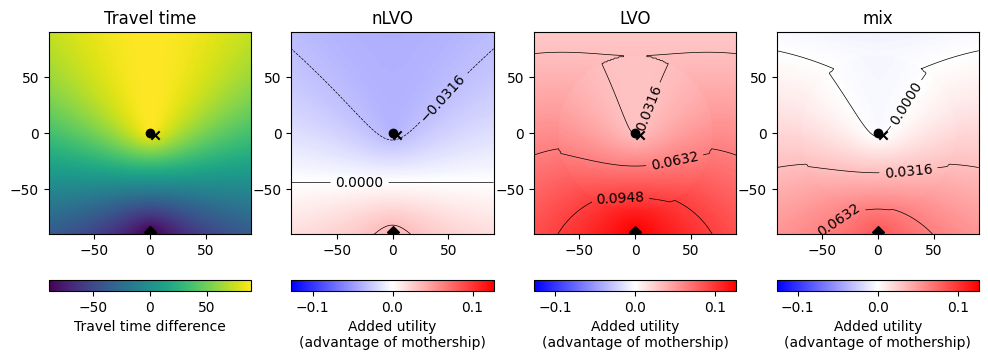

In [52]:
plot_geography_outliers(dict_grid_time_travel, dict_grid_time_travel_info, dict_outcomes_dicts, patient_x, patient_y)

### Utility matrix

In [54]:
matrix_mixed = pd.read_csv(os.path.join(dir_data, 'outcome_matrix_treated_ischaemic.csv'))

In [55]:
matrix_mixed

,added_utility,mean_mrs,mrs_less_equal_2,mrs_shift,onset_to_needle_mins,onset_to_puncture_mins
0,0.204965,1.857484,0.641840,-1.108209,0.0,0.0
1,0.203045,1.869066,0.639726,-1.096627,10.0,0.0
2,0.201106,1.880724,0.637591,-1.084969,20.0,0.0
3,0.199148,1.892456,0.635435,-1.073237,30.0,0.0
4,0.197170,1.904261,0.633259,-1.061432,40.0,0.0
...,...,...,...,...,...,...
1857,0.007860,2.937686,0.430879,-0.028007,330.0,480.0
1858,0.004365,2.956387,0.427194,-0.009306,340.0,480.0
1859,0.000860,2.975102,0.423506,0.009409,350.0,480.0
1860,-0.002655,2.993831,0.419814,0.028138,360.0,480.0


In [56]:
n_times_ivt = len(set(matrix_mixed['onset_to_needle_mins']))
n_times_mt = len(set(matrix_mixed['onset_to_puncture_mins']))

grid_shape = (n_times_mt, n_times_ivt)

t_max_ivt = matrix_mixed['onset_to_needle_mins'].max()
t_max_mt = matrix_mixed['onset_to_puncture_mins'].max()

t_step_ivt = np.diff(matrix_mixed['onset_to_needle_mins'].values.reshape(grid_shape))[0][0]
t_step_mt = np.diff(matrix_mixed['onset_to_puncture_mins'].values.reshape(grid_shape))[0][0]

# Instead of the axes showing the row, column numbers of the grid,
# use this extent to scale the row, column numbers to the times.
# Extra division by 60 for conversion to hours.
grid_extent = np.array([
    - t_step_ivt * 0.5, t_max_ivt + t_step_ivt * 0.5,  # x-limits
    - t_step_mt * 0.5, t_max_mt + t_step_mt * 0.5     # y-limits
]) / 60.0

In [57]:
import matplotlib.ticker as ticker  # for axis tick locations

In [58]:
def plot_matrix_with_outliers(units_to_plot):
    fig, ax = plt.subplots()
    
    # Plot the matrix:
    c = ax.imshow(
        matrix_mixed['added_utility'].values.reshape(grid_shape),
        extent=grid_extent,
        origin='lower',
        cmap='plasma'
    )
    plt.colorbar(c, label='Added utility')
    # Contours:
    img1 = ax.contour(
        matrix_mixed['added_utility'].values.reshape(grid_shape),
        extent=grid_extent,
        levels=np.arange(0.0, 0.21, 0.01),
        colors='k',
        linewidths=0.5,
        # aspect=aspect,
    )
    ax.clabel(img1, inline=True, fontsize=10)

    for ivt_unit in units_to_plot:
        gdf_patients_normal = sa_data_gdf.loc[sa_data_gdf['closest_ivt_unit'] == ivt_unit]
        gdf_patients_outliers = gdf_out_adv.loc[gdf_out_adv['closest_ivt_unit'] == ivt_unit]
        mask = gdf_patients_normal.index.isin(gdf_patients_outliers.index.values)
        gdf_patients_normal = gdf_patients_normal.loc[~mask]
        # Scatter some patient timings:
        ax.scatter(
            [gdf_patients_normal['ivt_drip_ship'] / 60.0, gdf_patients_normal['ivt_mothership'] / 60.0],
            [gdf_patients_normal['mt_drip_ship'] / 60.0, gdf_patients_normal['mt_mothership'] / 60.0],
            marker='x',
            color='k',
            label=f'{ivt_unit} normal'
            # color='rgba(0, 0, 0, 0.2)'
        )
        ax.plot(
            [gdf_patients_normal['ivt_drip_ship'] / 60.0, gdf_patients_normal['ivt_mothership'] / 60.0],
            [gdf_patients_normal['mt_drip_ship'] / 60.0, gdf_patients_normal['mt_mothership'] / 60.0],
            color='k',
        )
        # Outliers:
        ax.scatter(
            [gdf_patients_outliers['ivt_drip_ship'] / 60.0, gdf_patients_outliers['ivt_mothership'] / 60.0],
            [gdf_patients_outliers['mt_drip_ship'] / 60.0, gdf_patients_outliers['mt_mothership'] / 60.0],
            marker='x',
            color='LimeGreen',
            label=f'{ivt_unit} outliers'
            # color='rgba(0, 0, 0, 0.2)'
        )
        ax.plot(
            [gdf_patients_outliers['ivt_drip_ship'] / 60.0, gdf_patients_outliers['ivt_mothership'] / 60.0],
            [gdf_patients_outliers['mt_drip_ship'] / 60.0, gdf_patients_outliers['mt_mothership'] / 60.0],
            color='LimeGreen',
        )
    
    ax.legend()
    
    ax.set_xlabel('Time to IVT (hours)\nif applicable')
    ax.set_ylabel('Time to MT (hours)\nif applicable')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    
    plt.show()

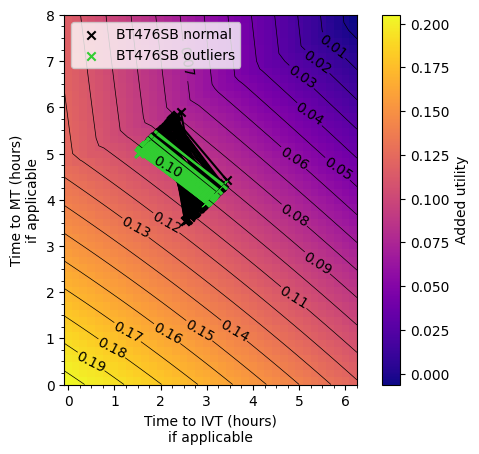

In [59]:
plot_matrix_with_outliers(['BT476SB'])

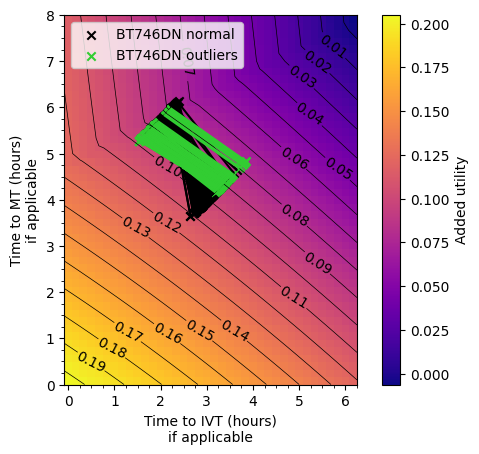

In [60]:
plot_matrix_with_outliers(['BT746DN'])

## Conclusion

The outlier areas are usually where there is a short travel time to the nearest stroke unit and a considerably longer time to the MT centre. The time difference is typically over 80 minutes.

The reason behind the worse outcomes is that the disbenefit from the increased time to IVT outweighs any additional benefit from decreasing time to MT.